FINDING INFLUENTIAL USER WITH DEGREE CENTRALITY

In [ ]:
import networkx as nx
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

**DATA PREPARATION**

Extracting Retweets

In [ ]:
#Data crawled with GET TAGS, using "#ReformasiDiKorupsi" as a search value
tweetfile = 'Crawling.xlsx'

tweets = pd.read_excel(tweetfile)

In [ ]:
# Export edges from Retweets

tweets['retweets'] = tweets['text'].str.extract('RT @([a-zA-Z0-9]\w{0,}):', expand=True)

edges = tweets[['from_user', 'retweets','created_at']]
edges.columns = ['Source', 'Target', 'Strength']

In [ ]:
strengthLevel = 2  # Network connection strength level: the number of times in total each of the tweeters responded to or mentioned the other.

edges2 = edges.groupby(['Source','Target'])['Strength'].count()
edges2 = edges2.reset_index()
edges2 = edges2[edges2['Strength'] >= strengthLevel]

In [ ]:
# Export nodes from the edges and add node attributes for both Sources and Targets.

users = tweets[['from_user','user_followers_count','user_friends_count']]
users = users.sort_values(['from_user','user_followers_count'], ascending=[True, False])
users = users.drop_duplicates(['from_user'], keep='first') 

ids = edges2['Source'].append(edges2['Target']).to_frame()
ids['Label'] = ids
ids.columns = ['from_user', 'Label']
ids = ids.drop_duplicates(['from_user'], keep='first') 
nodes = pd.merge(ids, users, on='from_user', how='left')

In [ ]:
edges2.columns = ['Source','Target','Strength']
nodes.columns = ['Id', 'Label', 'user_followers_count', 'user_friends_count']

In [ ]:
# Export edges to csv files
edges.to_csv('edges_retweets_for_dc.csv', encoding='utf-8', index=False)
edges2.to_csv('edges_retweets_for_visualization.csv', encoding='utf-8', index=False)

Extracting Mentions

In [ ]:
tweetfile = 'Crawling.xlsx'

tweets = pd.read_excel(tweetfile)

In [ ]:
# Export edges from Mentions
mentions = tweets[tweets['entities_str'].notnull()]

edges = pd.DataFrame(columns=('Source','Target','Strength'))

for index, row in mentions.iterrows():
    json_acceptable_string = row['entities_str'].replace("''", "\"")
    d = json.loads(json_acceptable_string)
    mention_list = d['user_mentions']
    for mention in mention_list:
        edges = edges.append(pd.DataFrame([[row['from_user'],
                                        mention['screen_name'],
                                        row['created_at']]]
                                        , columns=('Source','Target','Strength')), ignore_index=True)

In [ ]:
strengthLevel = 2  # Network connection strength level: the number of times in total each of the tweeters responded to or mentioned the other.

edges2 = edges.groupby(['Source','Target'])['Strength'].count()
edges2 = edges2.reset_index()
edges2 = edges2[edges2['Strength'] >= strengthLevel]

In [ ]:
# Export nodes from the edges and add node attributes for both Sources and Targets.

users = tweets[['from_user','user_followers_count', 'user_friends_count']]
users = users.sort_values(['from_user','user_followers_count'], ascending=[True, False])
users = users.drop_duplicates(['from_user'], keep='first') 

ids = edges2['Source'].append(edges2['Target']).to_frame()
ids['Label'] = ids
ids.columns = ['from_user', 'Label']
ids = ids.drop_duplicates(['from_user'], keep='first') 
nodes = pd.merge(ids, users, on='from_user', how='left')

In [ ]:
edges2.columns = ['From','To','Date']
nodes.columns = ['Id', 'Label', 'user_followers_count', 'user_friends_count']

In [ ]:
# Export edges to csv files
edges.to_csv('edges_mentions_for_dc.csv', encoding='utf-8', index=False)
edges2.to_csv('edges_mentions_for_visualization.csv', encoding='utf-8', index=False)

Extracting Replies

In [ ]:
tweetfile = 'Crawling.xlsx'

tweets = pd.read_excel(tweetfile)

In [ ]:
# Export edges from Replies

replies = tweets[tweets['in_reply_to_screen_name'].notnull()]

edges = replies[['from_user', 'in_reply_to_screen_name','created_at']]
edges.columns = ['Source', 'Target', 'Strength']

In [ ]:
strengthLevel = 2  # Network connection strength level: the number of times in total each of the tweeters responded to or mentioned the other.

edges2 = edges.groupby(['Source','Target'])['Strength'].count()
edges2 = edges2.reset_index()
edges2 = edges2[edges2['Strength'] >= strengthLevel]

In [ ]:
# Export nodes from the edges and add node attributes for both Sources and Targets.

users = tweets[['from_user','user_followers_count', 'user_friends_count']]
users = users.sort_values(['from_user','user_followers_count'], ascending=[True, False])
users = users.drop_duplicates(['from_user'], keep='first') 

ids = edges2['Source'].append(edges2['Target']).to_frame()
ids['Label'] = ids
ids.columns = ['from_user', 'Label']
ids = ids.drop_duplicates(['from_user'], keep='first') 
nodes = pd.merge(ids, users, on='from_user', how='left')

In [ ]:
edges2.columns = ['Source','Target','Strength']
nodes.columns = ['Id', 'Label', 'user_followers_count', 'user_friends_count']

In [ ]:
# Export edges to csv files
edges.to_csv('edges_replies_for_dc.csv', encoding='utf-8', index=False)
edges2.to_csv('edges_replies_for_visualization.csv', encoding='utf-8', index=False)

Combining 3 dataset into 1. to find the total count of connection/edges(retweets,replies,mention) a node(user) has

In [ ]:
retweets = pd.read_csv('edges_retweets_for_dc.csv')
mentions = pd.read_csv('edges_mentions_for_dc.csv')
replies = pd.read_csv('edges_replies_for_dc.csv')

retweets_count = retweets['Target'].value_counts().reset_index()
mentions_count = mentions['Target'].value_counts().reset_index()
replies_count = replies['Target'].value_counts().reset_index()

In [ ]:
combined = pd.concat([retweets_count, mentions_count, replies_count], ignore_index=True, sort=False)
combined.columns = ['user', 'count']

In [ ]:
combined.to_excel('combined.xlsx', index = False)

Weighting

counting the Degree Centrality value

In [ ]:
dataframe = pd.read_excel('combined.xlsx')

In [ ]:
# Degree Centrality
dc = []

for i in range(len(dataframe)):
  dc.append(dataframe['count'][i]/len(dataframe) - 1)

dataframe['Degree Centrality'] =  dc

In [ ]:
dataframe = dataframe.sort_values('Degree Centrality' ,ascending=False)

In [ ]:
# Show top 10 Influential User based on Degree Centrality value
dataframe.head(10)

,user,count,Degree Centrality
17,AksiLangsung,3207,13.445946
69,febridiansyah,1890,7.513514
136,maxwalden_,1198,4.396396
24,anandabadudu,253,0.139640
28,ansyahad,218,-0.018018
35,azizdharma,184,-0.171171
130,M_Asmara1701,176,-0.207207
213,unang_sunarno,159,-0.283784
110,kamalbukankemal,112,-0.495495
30,AnugrahBadai,91,-0.590090


In [ ]:
# Save result into excel file
dataframe.to_excel('result.xlsx', index = False)

Visualization

In [ ]:
edges_retweet = pd.read_csv('edges_retweets_for_visualization.csv')
edges_mention = pd.read_csv('edges_mentions_for_visualization.csv')
edges_replies = pd.read_csv('edges_replies_for_visualization.csv')

In [ ]:
G = nx.Graph()

for i in range(len(edges_retweet)):
  G.add_edge(edges_retweet['Source'][i],edges_retweet['Target'][i])

for i in range(len(edges_mention)):
  G.add_edge(edges_mention['From'][i],edges_mention['To'][i])

for i in range(len(edges_replies)):
  G.add_edge(edges_replies['Source'][i],edges_replies['Target'][i])

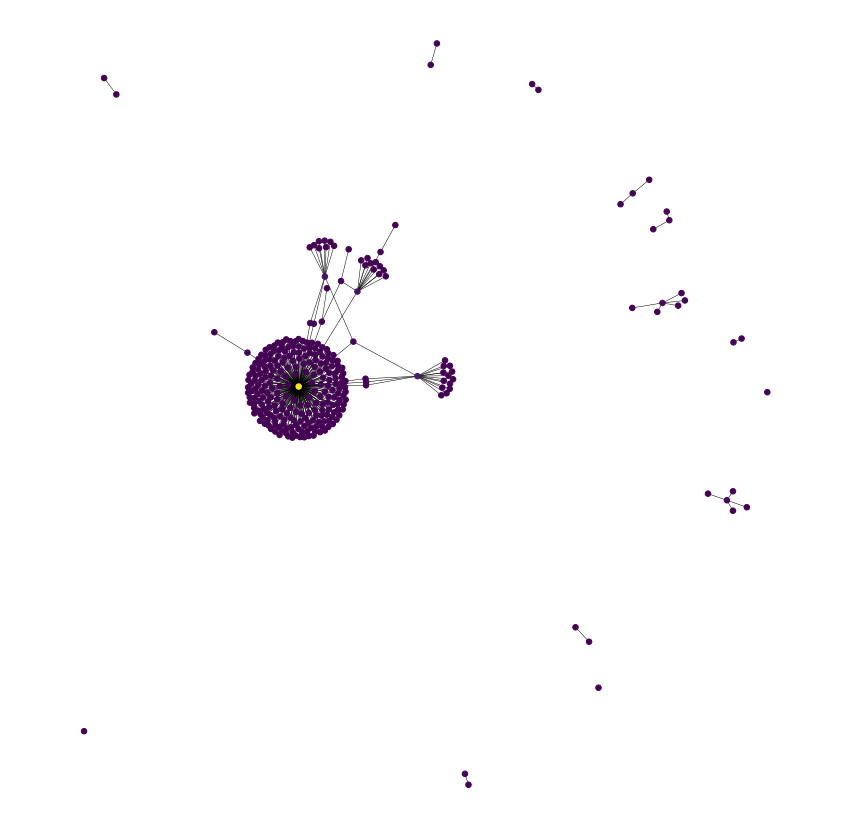

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
degrees = G.degree() #Dict with Node ID, Degree
nodes = G.nodes()
n_color = np.asarray([degrees[n] for n in nodes])
nx.spring_layout(G,k=0.05)
sc = nx.draw(G, nodelist=nodes, node_color=n_color, cmap='viridis', with_labels=False, ax=ax, node_size=30,width=0.5)
plt.axis('equal')
plt.show()